In [2]:
import random
import numpy as np
import pandas as pd

random.seed(3311791)
np.random.seed(3311791)

# Application on Patent Texts

### Loading Data and preprocessing

In [2]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/pilot_s.csv
/kaggle/input/english_li_ion_patents.csv


In [6]:
#file_path = '/kaggle/input/pilot_s.csv'
file_path = '/kaggle/input/english_li_ion_patents.csv'

data = pd.read_csv(file_path)

In [5]:
#data = pd.read_csv('pilot_en_plus.csv') # if running code locally
df = data.copy(deep=True)
pattern = r'(?s)\[EN\](.*?)(?:\[[A-Z]{2}\]|$)' # anything between [EN] and ([any capital two letter combination] or end of string)
#pattern = r'\[EN\](.*?)(?:\[[A-Z]{2}\]|$)' # test anything between [EN] and ([any capital two letter combination] or end of string)

df['Claim_EN'] = df['Claims'].str.extract(pattern)
df['Abstract_EN'] = df['Abstract'].str.extract(pattern)
df['Title_EN'] = df['Title'].str.extract(pattern)

df['Application.Date'] = pd.to_datetime(df['Application.Date'])
df['Year'] = df['Application.Date'].dt.year

In [7]:
df['Text'] = df['Title_EN'].str.cat(df['Abstract_EN'], sep=' ').str.cat(df['Claim_EN'], sep=' ')

In [8]:
# Split the 'Cooperative.Patent.Class' column into lists
df['CPC'] = df['Cooperative.Patent.Class'].str.split('\r\n')


In [9]:
df['CPC_short'] = df['CPC'].apply(lambda x: [i[:1] for i in x] if isinstance(x, list) else x)
df['CPC_short']

0                        [H, H, H, H, H, H, H, H, H, Y, Y]
1                        [H, H, H, H, H, H, H, H, H, Y, Y]
2        [H, H, H, H, H, H, H, H, H, H, H, H, H, H, H, ...
3        [H, H, H, H, H, H, H, H, H, H, H, H, H, H, H, ...
4                        [H, H, H, H, H, H, H, H, H, Y, Y]
                               ...                        
57047                          [H, H, H, H, H, H, H, Y, Y]
57048                          [H, H, H, H, H, H, H, Y, Y]
57049                          [H, H, H, H, H, Y, Y, Y, Y]
57050                          [H, H, H, H, H, H, Y, Y, Y]
57051                       [H, H, H, H, H, H, Y, Y, Y, Y]
Name: CPC_short, Length: 57052, dtype: object

In [10]:
df['CPC_unique'] = df['CPC_short'].apply(lambda x: list(set(x)) if isinstance(x, list) else x)
df.copy().explode('CPC_unique').shape

(138549, 23)

All patents have or should have H (Electricity class) in their CPC codes, as this is what was filtered for in the patent data search.

In [11]:
df['CPC_unique']

0        [H, Y]
1        [H, Y]
2        [H, Y]
3        [H, Y]
4        [H, Y]
          ...  
57047    [H, Y]
57048    [H, Y]
57049    [H, Y]
57050    [H, Y]
57051    [H, Y]
Name: CPC_unique, Length: 57052, dtype: object

In [12]:
one_hot_encoded = pd.get_dummies(df['CPC_unique'].apply(pd.Series).stack()).groupby(level=0).sum()

df = pd.concat([df, one_hot_encoded], axis=1)
df

,Unnamed: 0,Application.Date,Country.Code,Probable.Patent.Assignee,Family.Number,Title,Priority.Dates,Abstract,Claims,Number.of.Forward.Citations,...,CPC_unique,A,B,C,D,E,F,G,H,Y
0,1,2014-02-06,AU,ENCELL TECHNOLOGY INC,57136128,[EN] BATTERY COMPRISING A COATED IRON ANODE AN...,2013-02-06\r\n2014-01-14\r\n2014-01-14\r\n2014...,[EN] The present invention provides one with a...,[EN] What is claimed is: 1. A battery comprisi...,0,...,"[H, Y]",0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
1,2,2014-02-06,AU,ENCELL TECHNOLOGY INC,57136128,[EN] BATTERY COMPRISING A COATED IRON ANODE AN...,2013-02-06\r\n2014-01-14\r\n2014-01-14\r\n2014...,[EN] The present invention provides one with a...,[EN] - 11 The Claims Defining the Invention ar...,0,...,"[H, Y]",0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
2,3,2014-02-06,AU,ENCELL TECHNOLOGY INC,57136128,[EN] PROCESS FOR FORMING A BATTERY CONTAINING ...,2013-02-06\r\n2013-11-08\r\n2014-02-06,[EN] Provided is a process for activating a ba...,[EN] What is claimed is: 1. A process for acti...,0,...,"[H, Y]",0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
3,4,2014-02-06,AU,ENCELL TECHNOLOGY INC,57136128,[EN] PROCESS FOR FORMING A BATTERY CONTAINING ...,2013-02-06\r\n2013-11-08\r\n2014-02-06,[EN] Provided is a process for activating a ba...,[EN] - 11 The Claims Defining The Invention Ar...,0,...,"[H, Y]",0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
4,5,2014-02-06,CA,ENCELL TECHNOLOGY INC,57136128,[EN] BATTERY COMPRISING A COATED IRON ANODE AN...,2013-02-06\r\n2014-01-14\r\n2014-01-14\r\n2014...,[EN] Iron electrodes have been used in energy ...,[EN] What is claimed is:1. A battery comprisin...,0,...,"[H, Y]",0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57047,226103,2020-08-18,EP,FUJIFILM HOLDINGS CORP,83545109,[EN] METHOD FOR PRODUCING MOLDED BODY FOR ELEC...,2019-08-19\r\n2020-08-18,[EN] A method of manufacturing a formed body f...,[EN] 1. A method of manufacturing a formed bod...,0,...,"[H, Y]",0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
57048,226107,2021-12-28,US,FUJIFILM HOLDINGS CORP,83545109,[EN] METHOD OF MANUFACTURING FORMED BODY FOR E...,2019-08-19\r\n2020-08-18\r\n2021-12-28,[EN] A method of manufacturing a formed body f...,[EN] 1. A method of manufacturing a formed bod...,0,...,"[H, Y]",0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
57049,226114,2017-01-11,US,FUJIFILM HOLDINGS CORP,61604174,"[EN] ALL SOLID-STATE SECONDARY BATTERY, INORGA...",2014-07-31\r\n2015-07-29\r\n2017-01-11,[EN] Provided are an all solid-state secondary...,[EN] 1. An all solid-state secondary battery c...,0,...,"[H, Y]",0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
57050,226115,2017-01-11,US,FUJIFILM HOLDINGS CORP,61604174,"[EN] ALL SOLID-STATE SECONDARY BATTERY, INORGA...",2014-07-31\r\n2015-07-29,[EN] Provided are an all solid-state secondary...,[EN] 1. An all solid-state secondary battery c...,12,...,"[H, Y]",0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0


In [13]:
!pip install miceforest


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.9/43.9 kB 1.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.2/58.2 kB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 43.1 MB/s eta 0:00:00:00:01


In [14]:
variables_mf = ['Country.Code', 'Probable.Patent.Assignee', 'Family.Number', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'Y'] # 'Family.Number' was not relevant in LASSO or RandomForest

print(df.isna().sum())
df.dropna(subset=['Application.Date'], inplace=True)


Unnamed: 0                        0
Application.Date                  1
Country.Code                      0
Probable.Patent.Assignee          2
Family.Number                     0
Title                             0
Priority.Dates                    5
Abstract                          0
Claims                            0
Number.of.Forward.Citations       0
Cooperative.Patent.Class       2155
Grant                             0
Abstract.Languages                0
Claims.Languages                  0
Title.Languages                   0
Claim_EN                          0
Abstract_EN                       0
Title_EN                          0
Year                              1
Text                              0
CPC                            2155
CPC_short                      2155
CPC_unique                     2155
A                              2155
B                              2155
C                              2155
D                              2155
E                           

In [15]:
df['Probable.Patent.Assignee'].value_counts()

Probable.Patent.Assignee
LG ENERGY SOLUTION LTD                           7358
SAMSUNG SDI CO LTD                               4125
TOYOTA JIDOSHA KK                                1449
ROBERT BOSCH GMBH                                1395
SANYO ELECTRIC CO LTD                             978
                                                 ... 
YANG JERRY                                          1
COVESTRO INTELLECTUAL PROPERTY GMBH AND CO KG       1
ORCA SCIENCES LLC                                   1
L TEC BATTERY GMBH                                  1
SEBITCHEM                                           1
Name: count, Length: 3130, dtype: int64

In [16]:
import numpy as np

counts = df['Probable.Patent.Assignee'].value_counts()
df['Probable.Patent.Assignee'] = df['Probable.Patent.Assignee'].map(lambda x: 'single_patent_in_dataset' if x in counts and counts[x] == 1 and x is not np.nan else x)


In [17]:
columns = ['Country.Code', 'Probable.Patent.Assignee', 'Family.Number']
df_impute = df.copy()
for col in columns:
    counts = df_impute[col].value_counts()
    df_impute[col] = df_impute[col].map(lambda x: 'rare_occurrence' if pd.notnull(x) and counts[x] <= 100 else x)
    df_impute[col] = df_impute[col].map(lambda x: str(x) if pd.notnull(x) else x)


In [18]:
import miceforest as mf
variables_mf = ['Country.Code', 'Probable.Patent.Assignee', 'Family.Number', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'Y'] 

df_impute[variables_mf] = df_impute[variables_mf].astype('category')

kernel = mf.ImputationKernel(
  data=df_impute[variables_mf],
  save_all_iterations=True,
  random_state=0
)
kernel.mice(5, verbose=True, min_data_in_leaf=20, num_iterations=5)
df_impute[variables_mf] = kernel.complete_data()

df.loc[df['Probable.Patent.Assignee'].isna(), 'Probable.Patent.Assignee'] = df_impute.loc[df['Probable.Patent.Assignee'].isna(), 'Probable.Patent.Assignee']
for col in ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'Y']:
    df[col] = df_impute[col]

/opt/conda/lib/python3.10/site-packages/miceforest/ImputationKernel.py:370: UserWarning: [Probable.Patent.Assignee] have very rare categories, it is a good idea to group these, or set the min_data_in_leaf parameter to prevent lightgbm from outputting 0.0 probabilities.
  warn(


Initialized logger with name mice 1-5
Dataset 0
1  | Probable.Patent.Assignee | A | B | C | D | E | F | G | Y
2  | Probable.Patent.Assignee | A | B | C | D | E | F | G | Y
3  | Probable.Patent.Assignee | A | B | C | D | E | F | G | Y
4  | Probable.Patent.Assignee | A | B | C | D | E | F | G | Y
5  | Probable.Patent.Assignee | A | B | C | D | E | F | G | Y


In [19]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import nltk
from nltk.corpus import words
import re
nltk.download('stopwords')
nltk.download('punkt')
import spacy
nltk.download('words')

english_words = set(words.words())
nlp = spacy.load('en_core_web_sm', disable = ['ner', 'parser'])

[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package words to /usr/share/nltk_data...
[nltk_data]   Package words is already up-to-date!


# Lemmatize, remove stopwords and punctuation

In [21]:
import multiprocessing as mp
from multiprocessing import Pool

custom_stopwords = {'lithium', 'ion', 'battery', 'cell', 'said', 'wherein', 'herein', 'one', 'claim', 'claims', 'comprise', 'comprising', 'say', 'first', 'second', 'third'}
stop_words = set(stopwords.words('english')).union(custom_stopwords)

def preprocess(text):
    doc = nlp(text)
    text = " ".join([token.lemma_.lower() for token in doc if token.is_alpha and token.pos_ in ['NOUN', 'PROPN'] and token.lemma_.lower() not in stop_words]) # lemmatize if alphanumeric and is a noun or proper noun and not in stopwords
    return [word for word in text.split() if len(word) >= 2]# in english_words]

def parallelize_dataframe(df, func, n_cores=4):
    df_split = np.array_split(df, n_cores)
    pool = Pool(n_cores)
    df = pd.concat(pool.map(func, df_split))
    pool.close()
    pool.join()
    return df

def apply_preprocess(df):
    df['Text_Lemma'] = df['Text'].apply(preprocess)
    return df

df = parallelize_dataframe(df, apply_preprocess)
df['Text_Lemma']
df['Text_Lemma_unlist'] = df['Text_Lemma'].apply(' '.join)
df.to_csv('df_lemma.csv', index=False)


/opt/conda/lib/python3.10/site-packages/numpy/core/fromnumeric.py:59: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


In [22]:
df['Text_Lemma']

0        [iron, anode, performance, invention, iron, an...
1        [iron, anode, performance, invention, iron, an...
2        [process, iron, process, iron, electrode, proc...
3        [process, iron, process, iron, electrode, proc...
4        [iron, anode, performance, iron, electrode, en...
                               ...                        
57047    [method, producing, molded, body, electrodes, ...
57048    [method, manufacturing, formed, body, method, ...
57049    [solid, state, secondary, inorganic, solid, el...
57050    [solid, state, secondary, inorganic, solid, el...
57051    [solid, state, secondary, inorganic, solid, el...
Name: Text_Lemma, Length: 57051, dtype: object

In [23]:
df['Text_Lemma_unlist'] = df['Text_Lemma'].apply(' '.join)

In [24]:
df.to_csv('df_lemma.csv', index=False)


In [35]:
!pip install umap-learn hdbscan
!pip install adjustText
!pip install BorutaShap
!pip install xlsxwriter
from BorutaShap import BorutaShap
from adjustText import adjust_text
import umap
import hdbscan
import numpy as np
import matplotlib.pyplot as plt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.2/5.2 MB 36.5 MB/s eta 0:00:0000:0100:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Using cached Cython-0.29.37-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.manylinux_2_24_x86_64.whl.metadata (3.1 kB)
Using cached Cython-0.29.37-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.manylinux_2_24_x86_64.whl (1.9 MB)
  Created wheel for hdbscan: filename=hdbscan-0.8.33-cp310-cp310-linux_x86_64.whl size=819466 sha256=30d11f49e5d8e60e5058bf821b3727378082a90c00fa5a91b02e9c5edcb91b80
  Stored in directory: /root/.cache/pip/wheels/75/0b/3b/dc4f60b7cc455efaefb62883a7483e76f09d06ca81cf87d610
Successfully built hdbscan
  Attempting uninstall: cython
    Found existing installation: Cython 3.0.8
    Uninstalling Cython-3.0.8:
      Successfully uninstalled Cython-3.0.8
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 159.9/159.9 kB 4.1 MB/s eta 0:00:

2024-04-10 07:32:46.617132: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-04-10 07:32:46.617392: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-04-10 07:32:46.832910: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [36]:
import itertools
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
import warnings
from scipy.sparse import SparseEfficiencyWarning
warnings.simplefilter('ignore', SparseEfficiencyWarning)

df['Family.Number'] = df['Family.Number'].astype(str)
#control_variables = ['Country.Code', 'Probable.Patent.Assignee', 'Patent_age_scaled', 'Family.Number', 'Grant_dummy', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'Y'] 
#control_dummies = pd.get_dummies(df[control_variables])

def get_tfidf_dummy(patent_df, max_df=0.95, tfidf_threshold_percentile=50, min_patent_cooc=2, max_feat=None, ngrams=(1,3)):
    '''
    tfidf_threshold = percentile of non-zero entries to be considered for co-occurrence analysis
    min_patent_cooc = how often word combinations need to occur in different patents to be considered for further analysis (min_df=2 already in TFIDF)
    '''

    tfidf_vectorizer = TfidfVectorizer(ngram_range=ngrams,
        max_df=max_df, min_df=2, stop_words="english", max_features=max_feat)

    tfidf = tfidf_vectorizer.fit_transform(patent_df['Text_Lemma_unlist'])
    tfidf_feature_names = tfidf_vectorizer.get_feature_names_out()

    X_tfidf = tfidf.copy()

#     Xc_tfidf = (X_tfidf.T * X_tfidf)
#     Xc_tfidf.setdiag(0)

    doc_coo_tfidf = pd.DataFrame(X_tfidf.todense(), columns=tfidf_feature_names)

    if tfidf_threshold_percentile is not None:
        # percentile of nonzero entries in TF-IDF matrix
        tfidf_threshold = np.percentile(X_tfidf.data, tfidf_threshold_percentile)
        X_tfidf[X_tfidf < tfidf_threshold] = 0
        X_tfidf[X_tfidf >= tfidf_threshold] = 1
    else:
        X_tfidf[X_tfidf > 0] = 1

    tfidf_df = pd.DataFrame(X_tfidf.todense(), columns=tfidf_feature_names)

    dummy_list = []

    for index, row in tfidf_df.iterrows():
        words = row[row > 0].index.tolist()

        # Get all pairs of words
        pairs = list(itertools.combinations(words, 2))

        row_dict = {}

        # For each pair of words, create a new dummy variable
        for pair in pairs:
            # Check if one word is a subgram of the other
            if pair[0] in pair[1] or pair[1] in pair[0]:
                continue

            # Create the name of the dummy variable
            dummy_var_name = f"{pair[0]}+{pair[1]}"

            # Set the value of the dummy variable for this patent to 1
            row_dict[dummy_var_name] = 1

        dummy_list.append(row_dict)

    tfidf_dummy = pd.DataFrame(dummy_list)

    tfidf_dummy.fillna(0, inplace=True)

    # Drop word pairs with few co-occurrences
    col_sums = tfidf_dummy.sum()
    cols_to_retain = col_sums[col_sums >= min_patent_cooc].index
    tfidf_dummy = tfidf_dummy[cols_to_retain]

    return tfidf_dummy


In [37]:
def get_clustered_cooc_dfs(tfidf_dummy, n_components):
        #UMAP and HDBSCAN
        reducer = umap.UMAP(metric='hamming', n_components=n_components, random_state=0)
        embedding = reducer.fit_transform(tfidf_dummy.T)

        clusterer = hdbscan.HDBSCAN(min_cluster_size=2)
        clusters = clusterer.fit_predict(embedding)

        col_names = [f'dim_{i}' for i in range(1, n_components + 1)]
        df_plt = pd.DataFrame(embedding, columns=col_names) # ['x', 'y', 'z'])
        df_plt['cluster'] = clusters
        df_plt['cluster'] = df_plt['cluster'].replace(-1, df_plt['cluster'].max() + 1)

        df_plt.index = tfidf_dummy.columns
        noise = df_plt['cluster'].max()
        filtered_df_plt = df_plt[df_plt['cluster'] != noise]


        noise_df = df_plt[df_plt['cluster'] == noise]
        noise_dummy = tfidf_dummy[noise_df.index].copy()

        cluster_dummy = tfidf_dummy[filtered_df_plt.index].copy()
        cluster_dummy.columns = pd.MultiIndex.from_arrays([filtered_df_plt['cluster'], cluster_dummy.columns], names=['cluster', 'variable'])
        cluster_dict = {cluster: list(cluster_dummy.columns[cluster_dummy.columns.get_level_values('cluster') == cluster].get_level_values('variable')) for cluster in cluster_dummy.columns.levels[0]}

        cluster_dummy_grouped = cluster_dummy.groupby(level='cluster', axis=1).sum()
        cluster_dummy_grouped.columns = [f'cluster_{cluster}' for cluster in cluster_dummy_grouped.columns]

        cluster_dummy_grouped[cluster_dummy_grouped > 1] = 1
        return noise_dummy, cluster_dummy_grouped, cluster_dict

In [38]:
from sklearn.ensemble import RandomForestRegressor
import sys, os

rf = RandomForestRegressor(random_state=0, n_jobs=-1, max_depth=5) # shallower trees = save time + less risk of overfitting / try several max_depths and report in a footnote/appendix (https://stats.stackexchange.com/questions/599446/why-is-recommended-depth-of-boruta-random-forest-between-3-and-7)

def disable_print_function():
    sys.stdout = open(os.devnull, 'w')
def enable_print_function():
    sys.stdout = sys.__stdout__
    
def run_BorutaShap(df, cluster_noise_control_dummy, n_try, perc=99): # start=None, stop=None,

    y = df['Number.of.Forward.Citations']#[(df['Year'] >= start) & (df['Year'] <= stop)]['Number.of.Forward.Citations']
    X = cluster_noise_control_dummy#[(df['Year'] >= start) & (df['Year'] <= stop)]
    #disable_print_function()
    Feature_Selector_shap = BorutaShap(model=rf, importance_measure='shap',
                                  classification=False, percentile=perc)
    Feature_Selector_shap.fit(X=X, y=y, n_trials=n_try, sample=False,
                      train_or_test = 'train', normalize=True,
            verbose=True, random_state=0)
   # enable_print_function()
    return Feature_Selector_shap

In [39]:
def find_top_sentences(file, tfidf_dummy, df_time_period, cluster_dict, n=5):#, min_citations=1):#, start=None, stop=None):
    results_df = pd.DataFrame()
    feat_imps = pd.read_csv(file)
    feat_imps = feat_imps[(~feat_imps['Features'].str.contains('Shadow') & feat_imps['Features'].str.contains('\+')) | feat_imps['Features'].str.contains('cluster_')]
    top_n_features = list(feat_imps.head(n)['Features'])

    for feature in top_n_features:
        if feature.startswith('cluster_'):
            cluster_num = int(feature.split('_')[1])
            variables = cluster_dict[cluster_num]

            for i, var in enumerate(variables):
                sentences = process_sentences(feature=var, df_time_period=df_time_period, tfidf_dummy=tfidf_dummy)#, start=start, stop=stop)
                sentences['cluster'] = cluster_num#cluster_num
                results_df = pd.concat([results_df, sentences])
        else:
            sentences = process_sentences(feature=feature, df_time_period=df_time_period, tfidf_dummy=tfidf_dummy)#, start=start, stop=stop)
            sentences['cluster'] = '-'
            results_df = pd.concat([results_df, sentences])
            
    out = results_df[['cluster','Number.of.Forward.Citations', 'Year', 'both_words_sentences', 'Word_1_sentences', 'Word_2_sentences', 'Text']]#[results_df['Number.of.Forward.Citations']>=min_citations] # 'Importance_Time_Period',
    return out

def process_sentences(feature, tfidf_dummy, df_time_period):#, start, stop):
        word_ngrams = feature.split('+')
    
        sentences = df_time_period[(tfidf_dummy[feature] == 1)]

       # sentences = sentences[(sentences['Year'] >= start) & (sentences['Year'] <= stop)]

        sentences = sentences[['Year', 'Text', 'Text_Lemma_unlist', 'Text_Lemma', 'Number.of.Forward.Citations']]
        # Add a new column for the time period
        # sentences['Importance_Time_Period'] = time_periods[i]

        if len(feature.split('+')[0].split()) >= 2:
            sentences['both_words_sentences'] = sentences['Text'].apply(lambda x: ' '.join([sent for sent in re.split('[.:;?!]', x) if word_ngrams[0][0:5] in sent.lower() and word_ngrams[1][0:5] in sent.lower() and ' '.join(word_ngrams).split()[1][0:5] in sent.lower()]))
            sentences['Word_1_sentences'] = sentences['Text'].apply(lambda x: ' '.join([sent for sent in re.split('[.:;?!]', x) if word_ngrams[0][0:5] in sent.lower() and ' '.join(word_ngrams).split()[1][0:4] in sent.lower()]))
            sentences['Word_2_sentences'] = sentences['Text'].apply(lambda x: ' '.join([sent for sent in re.split('[.:;?!]', x) if word_ngrams[1][0:5] in sent.lower()]))
        else:
            sentences['Word_1_sentences'] = sentences['Text'].apply(lambda x: ' '.join([sent for sent in re.split('[.:;?!]', x) if word_ngrams[0] in sent.lower()]))
            sentences['Word_2_sentences'] = sentences['Text'].apply(lambda x: ' '.join([sent for sent in re.split('[.:;?!]', x) if word_ngrams[1] in sent.lower()]))
            sentences['both_words_sentences'] = sentences['Text'].apply(lambda x: ' '.join([sent for sent in re.split('[.:;?!]', x) if word_ngrams[1] in sent.lower() and word_ngrams[0] in sent.lower()]))
        # Set the index to the feature name
        sentences.index = [feature] * len(sentences)
        return sentences
        # Append the sentences to the results dataframe
        
def save_as_xlsx(results):
    writer = pd.ExcelWriter('/kaggle/working/Coocurrence_sentences_timeframes.xlsx', engine='xlsxwriter')
    results[0].to_excel(writer, sheet_name='until 1990')
    results[1].to_excel(writer, sheet_name='1991 - 2008')
    results[2].to_excel(writer, sheet_name='2009 - 2016')
    results[3].to_excel(writer, sheet_name='2017 - today')

    workbook = writer.book

    wrap_format = workbook.add_format({'text_wrap': True})
    for sheet_name in ['until 1990', '1991 - 2008', '2009 - 2016', '2017 - today']:
        worksheet = writer.sheets[sheet_name]
        worksheet.set_column('A:Z', 20, wrap_format)
    writer.close()
    


before get_tfidf_dummy
before clustering
before BorutaShap


  0%|          | 0/1 [00:00<?, ?it/s]

0 attributes confirmed important: []
0 attributes confirmed unimportant: []
25154 tentative attributes remains: ['Family.Number_70239617', 'Family.Number_92841969', 'Probable.Patent.Assignee_W R GRACE AND CO CONN', 'Family.Number_50439461', 'Family.Number_88784468', 'cluster_337', 'Family.Number_86228346', 'Family.Number_10294993', 'Family.Number_33192309', 'Family.Number_1206398', 'Family.Number_52600040', 'Family.Number_75910635', 'Family.Number_92574916', 'Probable.Patent.Assignee_GLOBAL GRAPHENE GROUP INC', 'Family.Number_42777241', 'Family.Number_81517423', 'Family.Number_46627591', 'Family.Number_62328466', 'Family.Number_50435887', 'complex+method', 'Family.Number_51781847', 'jet+motion', 'Family.Number_33895783', 'Probable.Patent.Assignee_NATIONAL ENERGY TECHNOLOGY CO LTD', 'Family.Number_57490574', 'Family.Number_28157808', 'Family.Number_70375528', 'Family.Number_78664172', 'Family.Number_41622333', 'Family.Number_47033949', 'Family.Number_86357056', 'Family.Number_44936792',

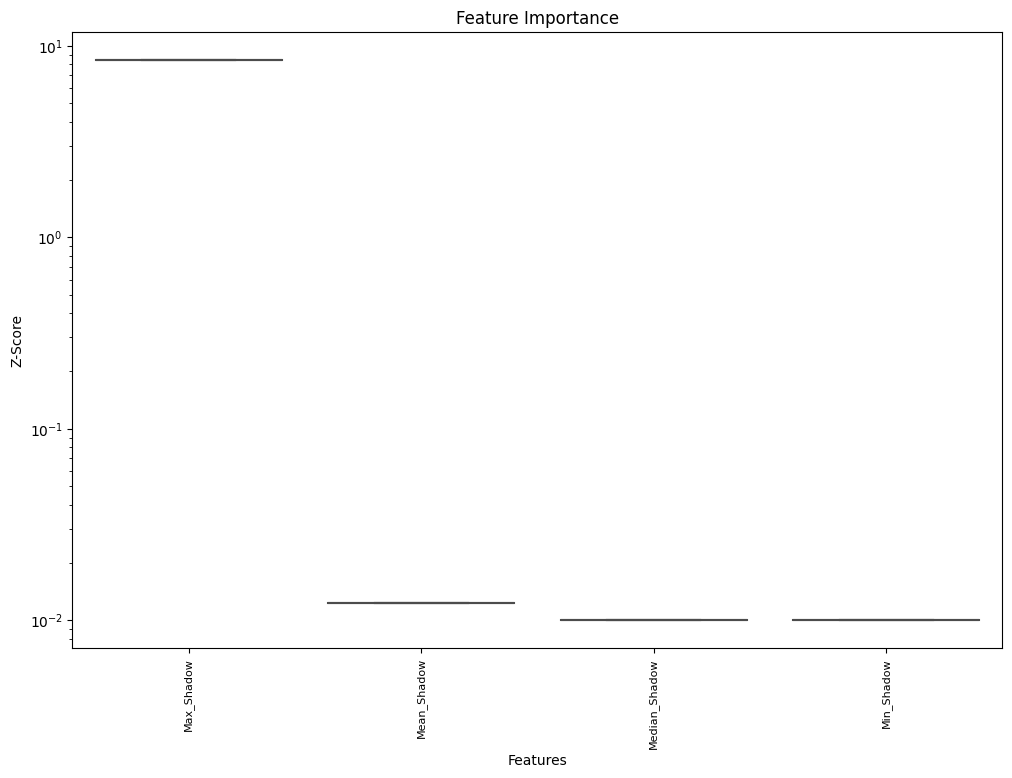

before find_top_sentences
before get_tfidf_dummy


In [ ]:
from sklearn.preprocessing import StandardScaler

df['Grant_dummy'] = df['Grant'].replace({'YES': 1, 'NO': 0})
control_variables = ['Country.Code', 'Probable.Patent.Assignee', 'Family.Number', 'Grant_dummy', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'Y']
df['Application.Date'] = pd.to_datetime(df['Application.Date'])
df['Patent_age'] = df['Application.Date'].dt.year - df['Application.Date'].dt.year.min()

def main(df, start=None, stop=None, max_df=0.50, max_feat=None, min_patent_cooc=2, tfidf_threshold_percentile=50, n_components=50, n_try=60):
    '''
    Main function: outputs csv files from BorutaShap and sentences of most important co-occurrences as a xlsx file
    '''
    scaler = StandardScaler()
    results = []
    filenames = []
    
    non_dummy_controls = df[df[control_variables].columns[df[control_variables].nunique() >2]]
    dummy_controls = df[df[control_variables].columns[df[control_variables].nunique() <=2]]
    control_dummies = pd.concat([pd.get_dummies(non_dummy_controls), dummy_controls], axis=1)
    
    time_periods = [(min(df['Year']), 1990), (1991, 2008), (2009, 2016), (2017, max(df['Year']))]

    for i, (start, stop) in enumerate(time_periods):
        df_time_period = df[(df['Year'] >= start) & (df['Year'] <= stop)]

        # add normalized (for each time period) patent age to controls
        control_dummies_time_period = control_dummies[(df['Year'] >= start) & (df['Year'] <= stop)].reset_index(drop=True)
        control_dummies_time_period['Patent_age_scaled'] = scaler.fit_transform(df_time_period[['Patent_age']])

        print('before get_tfidf_dummy')
        tfidf_dummy = get_tfidf_dummy(df_time_period, max_df=max_df, max_feat=max_feat, min_patent_cooc=min_patent_cooc, tfidf_threshold_percentile=tfidf_threshold_percentile)
        print('before clustering')
        noise_dummy, cluster_dummy_grouped, cluster_dict = get_clustered_cooc_dfs(tfidf_dummy, n_components=n_components) # noise=non-clustered co-occurrences

        
        cluster_noise_control_dummy = pd.concat([control_dummies_time_period, noise_dummy, cluster_dummy_grouped], axis=1)

        #BorutaShap importances
        # Run BorutaShap for the current time period
        print('before BorutaShap')
        Feature_Selector_shap = run_BorutaShap(df=df_time_period, cluster_noise_control_dummy=cluster_noise_control_dummy, perc=99, n_try=n_try)#start=start, stop=stop,
        Feature_Selector_shap.plot(which_features='accepted')
        filename = f'feature_importance_{start}_to_{stop}'#.csv'

        Feature_Selector_shap.results_to_csv(filename=filename)

        filenames.append(filename)
        
        print('before find_top_sentences')
        result = find_top_sentences(file= filenames[i]+'.csv', tfidf_dummy=tfidf_dummy, df_time_period=df_time_period.reset_index(drop=True), cluster_dict=cluster_dict)# + '.csv' #, start=start, stop=stop)

        results.append(result) 
        
    save_as_xlsx(results)
    
main(df, max_df=0.5, max_feat=None, tfidf_threshold_percentile=95, n_components=50, n_try=1) 
# try perc=100?
# could use Feature_Selector.TentativeRoughFix()

In [ ]:
# cluster_dict = {cluster: list(cluster_dummy.columns[cluster_dummy.columns.get_level_values('cluster') == cluster].get_level_values('variable')) for cluster in cluster_dummy.columns.levels[0]}
# len(cluster_dict)

In [ ]:
#5k patents
import umap
import hdbscan
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# increase n_components and dimensionality for HDBSCAN?!?!
reducer = umap.UMAP(metric='hamming', n_components=3, random_state=0) # random seed
embedding = reducer.fit_transform(tfidf_dummy.T)

# Use HDBSCAN for clustering
clusterer = hdbscan.HDBSCAN(min_cluster_size=2)#min_cluster_size=int(len(tfidf_dummy)/10))#, metric='hamming')#,
                           # min_samples=3) # random seed?
clusters = clusterer.fit_predict(embedding)

df_plt = pd.DataFrame(embedding, columns=['x', 'y', 'z'])
df_plt['cluster'] = clusters
df_plt['cluster'] = df_plt['cluster'].replace(-1, df_plt['cluster'].max() + 1)

df_plt.index = tfidf_dummy.columns

cluster_dummy_grouped = cluster_dummy.groupby(level='cluster', axis=1).sum()
cluster_dummy_grouped.columns = [f'cluster_{cluster}' for cluster in cluster_dummy_grouped.columns]
cluster_dummy_grouped[cluster_dummy_grouped > 1] = 1

# find cluster members: #Find the cluster members
# cluster = 2
# cluster_dummy.xs(cluster, level='cluster', axis=1).sum()

In [ ]:
noise = df_plt['cluster'].max()
filtered_df_plt = df_plt[df_plt['cluster'] != noise]
filtered_df_plt

In [ ]:
noise_df = df_plt[df_plt['cluster'] == noise]
noise_dummy = tfidf_dummy[noise_df.index].copy()

In [ ]:
cluster_dummy = tfidf_dummy[filtered_df_plt.index].copy()
#clustered_df.columns = filtered_df_plt['cluster']
cluster_dummy.columns = pd.MultiIndex.from_arrays([filtered_df_plt['cluster'], cluster_dummy.columns], names=['cluster', 'variable'])

In [ ]:
df_plt['cluster'].nunique()

In [ ]:
cluster_dummy_grouped = cluster_dummy.groupby(level='cluster', axis=1).sum()
cluster_dummy_grouped.columns = [f'cluster_{cluster}' for cluster in cluster_dummy_grouped.columns]

In [ ]:
cluster_dummy_grouped[cluster_dummy_grouped > 1] = 1

In [ ]:
#Find the cluster members
cluster = 2
cluster_dummy.xs(cluster, level='cluster', axis=1).sum()

In [ ]:
# clusters = filtered_df_plt['cluster'].unique()
# cluster_dict = {cluster: tfidf_dummy[filtered_df_plt[filtered_df_plt['cluster'] == cluster].index] for cluster in clusters}

In [ ]:
filtered_df_plt.groupby('cluster').size().describe()

df['Family.Number'] = df['Family.Number'].astype(str)
control_variables = ['Country.Code', 'Probable.Patent.Assignee', 'Patent_age_scaled', 'Family.Number', 'Grant_dummy', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'Y'] # 'Family.Number' was not relevant in LASSO or RandomForest
control_dummies = pd.get_dummies(df[control_variables])
print(control_dummies.shape) # more than 4,000 patent families

tfidf_all = pd.concat([control_dummies, tfidf_dummy, df['Number.of.Forward.Citations']], axis=1)
tfidf_all.shape

In [ ]:
cluster_noise_dummy = pd.concat([control_dummies, noise_dummy, cluster_dummy_grouped], axis=1)

In [ ]:
cluster_noise_dummy

In [ ]:
!pip install BorutaShap
from BorutaShap import BorutaShap


In [ ]:
from BorutaShap import BorutaShap
BorutaShap

In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from BorutaShap import BorutaShap

year = 2001
y = df[df['Year'] <= year]['Number.of.Forward.Citations']
X = cluster_noise_dummy[df['Year'] <= year]#.values

rf = RandomForestRegressor(random_state=123, n_jobs=-1, max_depth=5)#.fit(X, y, max_depth=5)
Feature_Selector_shap = BorutaShap(model=rf, importance_measure='shap', # 'shap'
                              classification=False, percentile=99)
Feature_Selector_shap.fit(X=X, y=y, n_trials=30, sample=False,
            	     train_or_test = 'train', normalize=True,
		     verbose=True, random_state=0) # max_depth=5 -> a lot faster -> but perhaps underfitting

In [ ]:
rf = RandomForestRegressor(random_state=123, n_jobs=-1, max_depth=5)

def run_BorutaShap(start=None, stop=None, n_try=5, perc=99):

    y = df[(df['Year'] >= start) & (df['Year'] <= stop)]['Number.of.Forward.Citations']
    X = cluster_noise_dummy[(df['Year'] >= start) & (df['Year'] <= stop)]

    Feature_Selector_shap = BorutaShap(model=rf, importance_measure='shap',
                                  classification=False, percentile=perc)
    Feature_Selector_shap.fit(X=X, y=y, n_trials=n_try, sample=False,
                      train_or_test = 'train', normalize=True,
            verbose=True, random_state=0)
    return Feature_Selector_shap

Feature_Selector_shap.results_to_csv(filename='feature_importance')

#['until 1990', '1991 - 2008', '2009 - 2017', '2017 - today']
# Define the time periods
time_periods = [(min(df['Year']), 1990), (1991, 2008), (2009, 2017), (2017, max(df['Year']))]

filenames= []
# Loop over the time periods
for start, stop in time_periods:
    # Run BorutaShap for the current time period
    Feature_Selector_shap = run_BorutaShap(start=start, stop=stop, perc=99)

    # Use different filenames for different time periods
    filename = f'feature_importance_{start}_to_{stop}.csv'

    Feature_Selector_shap.results_to_csv(filename=filename)

    filenames.append(filename)


In [ ]:
Feature_Selector_shap.results_to_csv(filename='feature_importance')

In [ ]:
Feature_Selector_shap.plot(which_features='accepted', figsize=(12,8)) # x label size: X_size=12

# First vs Last years Random Forest importances

In [ ]:
!pip install shap

In [ ]:
# import shap
# clustering = shap.utils.hclust(X_before_2001, y_before_2001)


In [ ]:
# explainer = shap.TreeExplainer(rf_pre2001)
# shap_values = explainer.shap_values(X_before_2001)
# shap.plots.bar(shap_values, clustering=clustering, clustering_cutoff=0.8)

In [ ]:
#Final model: impute values!!
#tfidf_all = tfidf_all.dropna().copy()

In [ ]:
import matplotlib.pyplot as plt
import shap
from sklearn.ensemble import RandomForestRegressor

def split_plot(X, y, model, additivity_check=True, perturbation_of_feature='interventional', time=None):
    importances = model.feature_importances_
    importances_series = pd.Series(importances, index=X.columns)
    dummy_vars = X.nunique()
    dummy_vars = dummy_vars[dummy_vars == 2].index.tolist()
    column_sums = X[dummy_vars].sum()
    normalized_sums = column_sums / len(X)
    data = pd.DataFrame({
        'Importance': importances_series,
        'Sum': column_sums,
        'Sum_norm': normalized_sums
    })
    data = data.sort_values(by='Importance')

    # Separate control variables and co-occurrences
    control_vars = [var for var in data.index if '+' not in var]
    co_occurrences = [var for var in data.index if '+' in var]

    # Create separate plots for control variables and co-occurrences
    for vars_list, title in zip([control_vars, co_occurrences], ['Control Variables', 'Co-Occurrences']):
        top_features = data.loc[vars_list][-20:]
        non_top_features = data.loc[vars_list].drop(top_features.index)
        sampled_features = non_top_features.sample(n=5, random_state=1)
        highest_freq_features = data.loc[vars_list].nlargest(5, 'Sum_norm')

        fig, ax = plt.subplots(figsize=(10,6))
        top_features['Importance'].plot(kind='barh', ax=ax, color='blue')
        for i in range(len(top_features)):
            if top_features.index[i] in dummy_vars:
                ax.text(top_features['Importance'].iloc[i], i,
                        ' ' + str(int(top_features['Sum'].iloc[i])),
                        va = 'center')
        plt.title(f"{title} {time} - Feature importances via Random Forest (n={X.shape[0]})")
        plt.show()
    # Scatterplot
    texts = []
    fig, ax = plt.subplots(figsize=(10,6))
    ax.scatter(data.loc[vars_list]['Sum_norm'], data.loc[vars_list]['Importance'])

    # Add labels for top features
    for i in top_features.index:
        if i in dummy_vars and np.isfinite(data.loc[i, 'Sum_norm']) and np.isfinite(data.loc[i, 'Importance']):
            texts.append(ax.text(data.loc[i, 'Sum_norm'], data.loc[i, 'Importance'], i, va='center', color='blue'))

    # Add labels for sampled non-top features
    for i in sampled_features.index:
        if np.isfinite(data.loc[i, 'Sum_norm']) and np.isfinite(data.loc[i, 'Importance']):
            texts.append(ax.text(data.loc[i, 'Sum_norm'], data.loc[i, 'Importance'], i, va='center'))

    # Add labels for features with highest relative frequencies
    for i in highest_freq_features.index:
        if np.isfinite(data.loc[i, 'Sum_norm']) and np.isfinite(data.loc[i, 'Importance']):
            texts.append(ax.text(data.loc[i, 'Sum_norm'], data.loc[i, 'Importance'], i, va='center', color='olive'))

    adjust_text(texts)
    plt.xlabel('Normalized Frequency')
    plt.ylabel('Feature Importance')
    plt.title(f"{title} {time} - Normalized Frequency vs Feature Importance (n={X.shape[0]})")
    plt.show()


    #SHAP
    if perturbation_of_feature == 'tree_path_dependent':
      background_matrix = None
    if perturbation_of_feature == 'interventional':
      background_matrix = np.zeros_like(X)
    explainer = shap.TreeExplainer(model, background_matrix, feature_perturbation = perturbation_of_feature)
    shap_values = explainer.shap_values(X, check_additivity=additivity_check)
    importance_order = np.argsort(importances)[::-1]

    X_reordered = X.iloc[:, importance_order]
    feature_names_reordered = X.columns[importance_order]
    shap.summary_plot(shap_values[:, importance_order], X_reordered, feature_names_reordered, sort=False)

    top_20_features = feature_names_reordered[:20]

    # top 3 SHAP values and their citations per feature
    for feature in top_20_features:
        # Get the SHAP values for this feature
        feature_shap_values = shap_values[:, X.columns.get_loc(feature)]
        # Get the indices of the instances with the 3 largest absolute SHAP values for this feature
        top_3_indices = np.argpartition(np.abs(feature_shap_values), -3)[-3:]
        # Print the top 3 SHAP values and their corresponding 'Number.of.Forward.Citations'
        for instance_index in top_3_indices:
            print(f"Feature: {feature}, SHAP Value: {feature_shap_values[instance_index]}, Number of Forward Citations: {y.iloc[instance_index]}")


# Co-Occurrences and Controls in different plots

The labels on the scatterplots are: the top-20 co-occurrences/controls (darker blue color) + sample of highest frequencies (olive) + a few random dots for comparison (black)

In [ ]:
tfidf = tfidf_all[df['Year'] <= 2001]
y = tfidf['Number.of.Forward.Citations']
X = tfidf.drop(columns=['Number.of.Forward.Citations'])
rf1 = RandomForestRegressor(random_state=123, n_jobs=-1).fit(X, y)

tfidf = tfidf_all[(df['Year'] >= 2009) & (df['Year'] <= 2011)]
y = tfidf['Number.of.Forward.Citations']
X = tfidf.drop(columns=['Number.of.Forward.Citations'])

rf2 = RandomForestRegressor(random_state=123, n_jobs=-1).fit(X, y)

tfidf = tfidf_all[(df['Year'] >= 2020)]
y = tfidf['Number.of.Forward.Citations']
X = tfidf.drop(columns=['Number.of.Forward.Citations'])

rf3 = RandomForestRegressor(random_state=123, n_jobs=-1).fit(X, y)

In [ ]:
split_plot(X, y, rf1, time='until 2001')
split_plot(X, y, rf2, time='2009-2011')
split_plot(X, y, rf3, time='from 2020')


In [ ]:
def find_top_features_and_sentences(df, X, models, tfidf_dummy, n=5, min_citations=1, start=None, stop=None):
    results_df = pd.DataFrame()

    # Define the time periods for each model
    time_periods = ['1900-2001','2009-2011','2020-2023']

    for i, model in enumerate(models):
        importances = model.feature_importances_

        importances_df = pd.DataFrame({
            'feature': X.columns,
            'importance': importances
        })

        importances_df = importances_df.sort_values(by='importance', ascending=False)

        co_occurrence_features = importances_df[importances_df['feature'].str.contains('\+')]

        top_n_features = co_occurrence_features['feature'].head(n)

        for feature in top_n_features:
            word_ngrams = feature.split('+')

            sentences = df[(tfidf_dummy[feature] == 1)]

            # Get the start and stop years from the time period of the current model
            sentences = sentences[(sentences['Year'] >= start) & (sentences['Year'] <= stop)]

            sentences = sentences[['Year', 'Text', 'Text_Lemma_unlist', 'Text_Lemma', 'Number.of.Forward.Citations']]
            # Add a new column for the time period
            sentences['Importance_Time_Period'] = time_periods[i]

            if len(feature.split('+')[0].split()) >= 2:
                sentences['both_words_sentences'] = sentences['Text'].apply(lambda x: ' '.join([sent for sent in re.split('[.:;?!]', x) if word_ngrams[0][0:5] in sent.lower() and word_ngrams[1][0:5] in sent.lower() and ' '.join(word_ngrams).split()[1][0:5] in sent.lower()]))
                sentences['Word_1_sentences'] = sentences['Text'].apply(lambda x: ' '.join([sent for sent in re.split('[.:;?!]', x) if word_ngrams[0][0:5] in sent.lower() and ' '.join(word_ngrams).split()[1][0:4] in sent.lower()]))
                sentences['Word_2_sentences'] = sentences['Text'].apply(lambda x: ' '.join([sent for sent in re.split('[.:;?!]', x) if word_ngrams[1][0:5] in sent.lower()]))
            else:
                sentences['Word_1_sentences'] = sentences['Text'].apply(lambda x: ' '.join([sent for sent in re.split('[.:;?!]', x) if word_ngrams[0] in sent.lower()]))
                sentences['Word_2_sentences'] = sentences['Text'].apply(lambda x: ' '.join([sent for sent in re.split('[.:;?!]', x) if word_ngrams[1] in sent.lower()]))
                sentences['both_words_sentences'] = sentences['Text'].apply(lambda x: ' '.join([sent for sent in re.split('[.:;?!]', x) if word_ngrams[1] in sent.lower() and word_ngrams[0] in sent.lower()]))
            # Set the index to the feature name
            sentences.index = [feature] * len(sentences)

            # Append the sentences to the results dataframe
            results_df = results_df.append(sentences)
            out = results_df[['Number.of.Forward.Citations', 'Year', 'Importance_Time_Period', 'both_words_sentences', 'Word_1_sentences', 'Word_2_sentences', 'Text']]#[results_df['Number.of.Forward.Citations']>=min_citations]
    #out_sorted = out.sort_values(by='Number.of.Forward.Citations', ascending=False)
    return out

models = [rf1, rf2, rf3]
res01 = find_top_features_and_sentences(df, X, models, tfidf_dummy, start=1967, stop=2001)
res02 = find_top_features_and_sentences(df, X, models, tfidf_dummy, start=2009, stop=2011)
res03 = find_top_features_and_sentences(df, X, models, tfidf_dummy, start=2020, stop=2023)



In [ ]:
res01

In [ ]:
print(res01.index.nunique())
print(res02.index.nunique())
print(res03.index.nunique())

In [ ]:
!pip install xlsxwriter

In [ ]:
writer = pd.ExcelWriter('Coocurrence_sentences_timeframes.xlsx', engine='xlsxwriter')
res01.to_excel(writer, sheet_name='until 2001')
res02.to_excel(writer, sheet_name='2009 - 2011')
res03.to_excel(writer, sheet_name='from 2020')
workbook = writer.book

wrap_format = workbook.add_format({'text_wrap': True})
for sheet_name in ['until 2001', '2009 - 2011', 'from 2020']:
    worksheet = writer.sheets[sheet_name]
    worksheet.set_column('A:Z', 20, wrap_format)
writer.save()
from google.colab import files
files.download('Coocurrence_sentences_timeframes.xlsx')

In [ ]:
Feature_Selector_shap

In [ ]:
Feature_Selector_shap.results_to_csv(filename='feature_importance')

In [ ]:
feat_imps = pd.read_csv('feature_importance.csv')
feat_imps = feat_imps[~feat_imps['Features'].str.contains('Shadow') & feat_imps['Features'].str.contains('\+')]
list(feat_imps.head(3)['Features'])

In [ ]:
cluster_noise_dummy[list(feat_imps.head(3)['Features'])][0:2]

In [ ]:
df['Text'][0]

In [ ]:
top_n_features = list(feat_imps.head(3)['Features'])
df[(cluster_noise_dummy[top_n_features[0]] == 1)]['Text'][df['Year']<2001]


In [ ]:
def find_top_sentences(file, n=5, min_citations=1, start=None, stop=None):
    results_df = pd.DataFrame()
    feat_imps = pd.read_csv(file)
    feat_imps = feat_imps[~feat_imps['Features'].str.contains('Shadow') & feat_imps['Features'].str.contains('\+')]
    top_n_features = list(feat_imps.head(n)['Features'])
#    time_periods = ['1900-1990','1991-2008', '2009-2017', '2017-2024']
    for feature in top_n_features:
        word_ngrams = feature.split('+')

        sentences = df[(tfidf_dummy[feature] == 1)]

        sentences = sentences[(sentences['Year'] >= start) & (sentences['Year'] <= stop)]

        sentences = sentences[['Year', 'Text', 'Text_Lemma_unlist', 'Text_Lemma', 'Number.of.Forward.Citations']]
        # Add a new column for the time period
        # sentences['Importance_Time_Period'] = time_periods[i]

        if len(feature.split('+')[0].split()) >= 2:
            sentences['both_words_sentences'] = sentences['Text'].apply(lambda x: ' '.join([sent for sent in re.split('[.:;?!]', x) if word_ngrams[0][0:5] in sent.lower() and word_ngrams[1][0:5] in sent.lower() and ' '.join(word_ngrams).split()[1][0:5] in sent.lower()]))
            sentences['Word_1_sentences'] = sentences['Text'].apply(lambda x: ' '.join([sent for sent in re.split('[.:;?!]', x) if word_ngrams[0][0:5] in sent.lower() and ' '.join(word_ngrams).split()[1][0:4] in sent.lower()]))
            sentences['Word_2_sentences'] = sentences['Text'].apply(lambda x: ' '.join([sent for sent in re.split('[.:;?!]', x) if word_ngrams[1][0:5] in sent.lower()]))
        else:
            sentences['Word_1_sentences'] = sentences['Text'].apply(lambda x: ' '.join([sent for sent in re.split('[.:;?!]', x) if word_ngrams[0] in sent.lower()]))
            sentences['Word_2_sentences'] = sentences['Text'].apply(lambda x: ' '.join([sent for sent in re.split('[.:;?!]', x) if word_ngrams[1] in sent.lower()]))
            sentences['both_words_sentences'] = sentences['Text'].apply(lambda x: ' '.join([sent for sent in re.split('[.:;?!]', x) if word_ngrams[1] in sent.lower() and word_ngrams[0] in sent.lower()]))
        # Set the index to the feature name
        sentences.index = [feature] * len(sentences)

        # Append the sentences to the results dataframe
        results_df = results_df.append(sentences)
    out = results_df[['Number.of.Forward.Citations', 'Year', 'both_words_sentences', 'Word_1_sentences', 'Word_2_sentences', 'Text']]#[results_df['Number.of.Forward.Citations']>=min_citations] # 'Importance_Time_Period',
#out_sorted = out.sort_values(by='Number.of.Forward.Citations', ascending=False)
    return out

results = []
for i, (start, stop) in enumerate(time_periods):
    result = find_top_sentences(start=start, stop=stop, file= filenames[i] + '.csv')
    results.append(result)

writer = pd.ExcelWriter('Coocurrence_sentences_timeframes.xlsx', engine='xlsxwriter')
results[0].to_excel(writer, sheet_name='until 1990')
results[1].to_excel(writer, sheet_name='1991 - 2008')
results[2].to_excel(writer, sheet_name='2009 - 2017')
results[3].to_excel(writer, sheet_name='2017 - today')

workbook = writer.book

wrap_format = workbook.add_format({'text_wrap': True})
for sheet_name in ['until 1990', '1991 - 2008', '2009 - 2017', '2017 - today']:
    worksheet = writer.sheets[sheet_name]
    worksheet.set_column('A:Z', 20, wrap_format)
writer.save()

# res02 = find_top_sentences(start=1991, stop=2008, file='feature_importance2.csv')
# res03 = find_top_sentences(start=2009, stop=2017, file='feature_importance3.csv')
# res04 = find_top_sentences(start=2017, stop=2024, file='feature_importance4.csv')


In [ ]:
writer = pd.ExcelWriter('Coocurrence_sentences_timeframes.xlsx', engine='xlsxwriter')
results[0].to_excel(writer, sheet_name='until 1990')
results[1].to_excel(writer, sheet_name='1991 - 2008')
results[2].to_excel(writer, sheet_name='2009 - 2017')
results[3].to_excel(writer, sheet_name='2017 - today')

workbook = writer.book

wrap_format = workbook.add_format({'text_wrap': True})
for sheet_name in ['until 1990', '1991 - 2008', '2009 - 2017', '2017 - today']:
    worksheet = writer.sheets[sheet_name]
    worksheet.set_column('A:Z', 20, wrap_format)
writer.save()

from google.colab import files
files.download('Coocurrence_sentences_timeframes.xlsx')

In [ ]:
outlier_indices = df['Number.of.Forward.Citations'].nlargest(10).index

df_largest = df.loc[outlier_indices, ['Year', 'Number.of.Forward.Citations']]

df_largest.reset_index(drop=True)

# Controls and Co-Occurrences together

In [ ]:
import matplotlib.pyplot as plt
import shap

def rf_plot(X, y, model, additivity_check=True, perturbation_of_feature='interventional', time=None):
    importances = model.feature_importances_
    importances_series = pd.Series(importances, index=X.columns)
    dummy_vars = X.nunique()
    dummy_vars = dummy_vars[dummy_vars == 2].index.tolist()
    column_sums = X[dummy_vars].sum()
    normalized_sums = column_sums / len(X)
    data = pd.DataFrame({
        'Importance': importances_series,
        'Sum': column_sums,
        'Sum_norm': normalized_sums
    })
    data = data.sort_values(by='Importance')
    top_features = data[-20:]
    fig, ax = plt.subplots(figsize=(10,6))
    top_features['Importance'].plot(kind='barh', ax=ax, color='blue')
    for i in range(len(top_features)):
        if top_features.index[i] in dummy_vars:
            ax.text(top_features['Importance'].iloc[i], i,
                    ' ' + str(int(top_features['Sum'].iloc[i])),
                    va = 'center')
    plt.title(f"Feature importances via Random Forest (n={X.shape[0]})")
    plt.show()


    # Scatter plot
    fig, ax = plt.subplots(figsize=(10,6))
    ax.scatter(data['Sum_norm'], data['Importance'])
    for i in top_features.index:
        if i in dummy_vars:
            ax.text(data.loc[i, 'Sum_norm'], data.loc[i, 'Importance'],
                    i,
                    va = 'center')
    plt.xlabel('Normalized Frequency')
    plt.ylabel('Feature Importance')
    plt.title(f" {time} - Normalized Frequency vs Feature Importance (n={X.shape[0]})")
    plt.show()


    # SHAP
    if perturbation_of_feature == 'tree_path_dependent':
      background_matrix = None
    if perturbation_of_feature == 'interventional':
      background_matrix = np.zeros_like(X)

    explainer = shap.TreeExplainer(model, background_matrix, feature_perturbation = perturbation_of_feature)
    shap_values = explainer.shap_values(X, check_additivity=additivity_check)
    importance_order = np.argsort(importances)[::-1]

    X_reordered = X.iloc[:, importance_order]
    feature_names_reordered = X.columns[importance_order]
    shap.summary_plot(shap_values[:, importance_order], X_reordered, feature_names_reordered, sort=False)

    top_20_features = feature_names_reordered[:20]

    # top 3 SHAP values and their citations per feature
    for feature in top_20_features:
        feature_shap_values = shap_values[:, X.columns.get_loc(feature)]
        top_3_indices = np.argpartition(np.abs(feature_shap_values), -3)[-3:]
        for instance_index in top_3_indices:
            print(f"Feature: {feature}, SHAP Value: {feature_shap_values[instance_index]}, Number of Forward Citations: {y.iloc[instance_index]}")



In [ ]:
tfidf = tfidf_all[df['Year'] <= 1990]
y = tfidf['Number.of.Forward.Citations']
X = tfidf.drop(columns=['Number.of.Forward.Citations'])

rf = RandomForestRegressor(random_state=123, n_jobs=-1).fit(X, y)
rf_plot(X, y, rf, perturbation_of_feature='tree_path_dependent', time='pre 1991')

In [ ]:
tfidf = tfidf_all[(df['Year'] >= 2009) & (df['Year'] <= 2011)]
y = tfidf['Number.of.Forward.Citations']
X = tfidf.drop(columns=['Number.of.Forward.Citations'])

rf = RandomForestRegressor(random_state=123, n_jobs=-1).fit(X, y)
rf_plot(X, y, rf, perturbation_of_feature='interventional', time='2009 - 2011')

In [ ]:
tfidf = tfidf_all[df['Year'] > 2020]
y = tfidf['Number.of.Forward.Citations']
X = tfidf.drop(columns=['Number.of.Forward.Citations'])

rf = RandomForestRegressor(random_state=123, n_jobs=-1).fit(X, y)
rf_plot(X, y, rf, time='post 2020')


https://scikit-learn.org/stable/modules/generated/sklearn.inspection.permutation_importance.html

dealing with multicollinearity + permutation importance: https://scikit-learn.org/stable/auto_examples/inspection/plot_permutation_importance_multicollinear.html